In [368]:
#Import all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Loading csv data

In [369]:
#Load the csv dataset as pandas dataframe
df = pd.read_csv('./data/Cars.csv')

In [370]:
#View the datsaet sample
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [371]:
#Get the info about all fields and their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [372]:
#List all the columns present in the dataset
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

### Preparing Data

In [373]:
# As per assignemnt map the catogorical values for owner into numerical (1-5)

def map_owner(df):
  '''
    Function to map the categotical value of 'owner' column into numerical labels '1-5'
    Input: dataframe
    Output: Dataframe with owner mapped owner column
  '''
  owners_list = list(df['owner'].unique())
  owner_mapping = {own:idx+1 for idx,own in enumerate(owners_list)}
  df = df.replace(owner_mapping)
  return df


df = map_owner(df)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [374]:
#Check the unique values in fuel feature
df['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [375]:
#Remove all rows with CNG and LPG

lpg_rows  = df['fuel'] == 'LPG'
cng_rows  = df['fuel'] == 'CNG'
# # select all rows except the ones that contain 'LPG'
df = df[~lpg_rows]
# # select all rows except the ones that contain 'CNG'
df = df[~cng_rows]

df['fuel'].unique()

<ipython-input-375-eab3a9637779>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[~cng_rows]


array(['Diesel', 'Petrol'], dtype=object)

In [376]:
#Function to convert the string value into float by striping the alphabetical
# characters and converting numerical value into float
def convert_float(str_value):
  if type(str_value) == str:
    return float(str_value.split()[0])
  else:
    return str_value

#Convert milage feature into float values by striping  'kmpl'
df['mileage'] = df['mileage'].apply(convert_float)
df['mileage'].info()


<class 'pandas.core.series.Series'>
Int64Index: 8033 entries, 0 to 8127
Series name: mileage
Non-Null Count  Dtype  
--------------  -----  
7819 non-null   float64
dtypes: float64(1)
memory usage: 125.5 KB


In [377]:
#Convert engine feature into float values by striping 'cc'
df['engine'] = df['engine'].apply(convert_float)
df['engine'].info()


<class 'pandas.core.series.Series'>
Int64Index: 8033 entries, 0 to 8127
Series name: engine
Non-Null Count  Dtype  
--------------  -----  
7819 non-null   float64
dtypes: float64(1)
memory usage: 125.5 KB


In [378]:
#Convert max_power feature into float values by striping 'bhp'
df['max_power'] = df['max_power'].apply(convert_float)
df['max_power'].info()

<class 'pandas.core.series.Series'>
Int64Index: 8033 entries, 0 to 8127
Series name: max_power
Non-Null Count  Dtype  
--------------  -----  
7825 non-null   float64
dtypes: float64(1)
memory usage: 125.5 KB


In [379]:
#Remane the column from name to brand
df = df.rename(columns={"name": "brand"})

#Replace the feature 'name' with only its first word
df['brand'] = df['brand'].apply(lambda brand: brand.split()[0])
df['brand'].info()

<class 'pandas.core.series.Series'>
Int64Index: 8033 entries, 0 to 8127
Series name: brand
Non-Null Count  Dtype 
--------------  ----- 
8033 non-null   object
dtypes: object(1)
memory usage: 125.5+ KB


In [380]:
#Drop the feature torque
df = df.drop('torque', axis=1)

In [381]:
#Remove the samples with the feature owner = "Test drive cars" whic after the mapping value becomes '5'

# Remove the data with owner type 'Test Drive' ie 5
test_drive_owner  = df['owner'] == 5
# select all rows except the ones that contain 'Test Drive Car' ie 5
df = df[~test_drive_owner]
df['owner'].unique()

array([1, 2, 3, 4])

In [382]:
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


### Feature Engineering

In [383]:
'''Since the algorithm does not understands the temporal variable such as year
  and by simply putting it as int value will not help model to make sense
  or generalise, so the year feature is changed into age by the function calculate_car_age'''

import datetime

def calculate_car_age(year):
  #This function calculate the year value by subtraction it with current year and gives total age of the car
  year_built = datetime.date(year, 1, 1)
  year_now = datetime.date.today()
  age = (year_now - year_built).days//365
  return age



'''Since the algorithm does not understands the temporal variable such as year
  and by simply putting it as int value will not help model to make sense
  or generalise, so the year feature is changed into age by the function calculate_car_age'''

import datetime

def calculate_car_age(year):
  #This function calculate the year value by subtraction it with current year and gives total age of the car
  year_built = datetime.date(year, 1, 1)
  year_now = datetime.date.today()
  age = (year_now - year_built).days//365
  return age


#Finally the year column is renamed into age column with the value equals to toal age of car

#Rename column year into age
df.rename(columns = {'year':'age'}, inplace = True)

# Apply function calculate_car_age to every value of age column
df['age'] = df['age'].apply(calculate_car_age)


In [384]:
df.head()

,brand,age,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,9,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,9,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,17,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,13,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,16,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [385]:
df.describe()

,age,selling_price,km_driven,owner,mileage,engine,max_power,seats
count,8028.000000,8.028000e+03,8.028000e+03,8028.000000,7814.000000,7814.000000,7820.000000,7814.000000
mean,9.184479,6.403937e+05,6.977314e+04,1.458022,19.391962,1462.914640,91.819726,5.421551
std,4.030836,8.027015e+05,5.664419e+04,0.715283,4.001972,504.759742,35.804513,0.963125
min,3.000000,2.999900e+04,1.000000e+03,1.000000,0.000000,624.000000,0.000000,2.000000
25%,6.000000,2.600000e+05,3.500000e+04,1.000000,16.780000,1197.000000,68.850000,5.000000
50%,8.000000,4.500000e+05,6.000000e+04,1.000000,19.300000,1248.000000,82.400000,5.000000
75%,12.000000,6.800000e+05,9.800000e+04,2.000000,22.320000,1582.000000,102.000000,5.000000
max,40.000000,1.000000e+07,2.360457e+06,4.000000,42.000000,3604.000000,400.000000,14.000000


### Univariate Analysis

##### Countplot

<Axes: xlabel='seller_type', ylabel='count'>

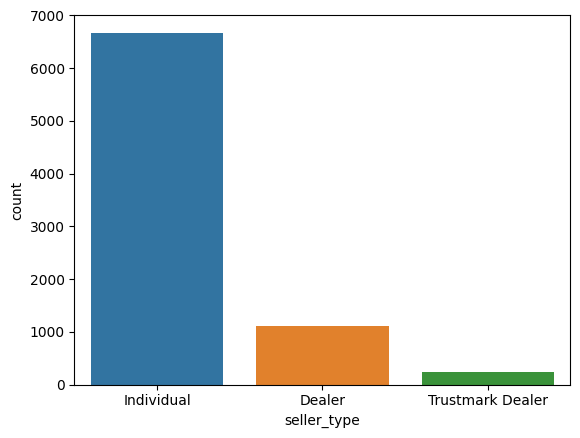

In [386]:
sns.countplot(data = df, x = 'seller_type')

##### Here the majority of seller type is individual seller

<Axes: xlabel='transmission', ylabel='count'>

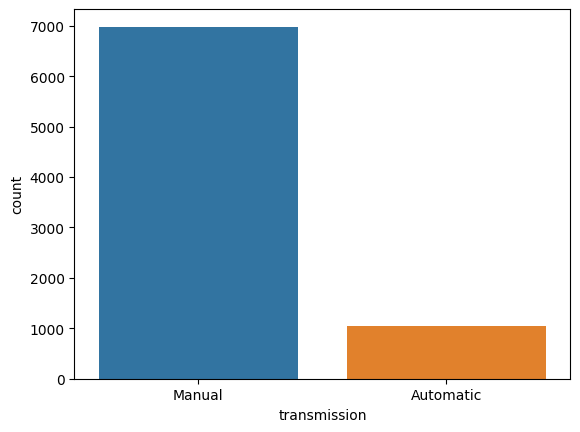

In [387]:
sns.countplot(data = df, x = 'transmission')

##### Here the majority of transmission type is manual

<Axes: xlabel='fuel', ylabel='count'>

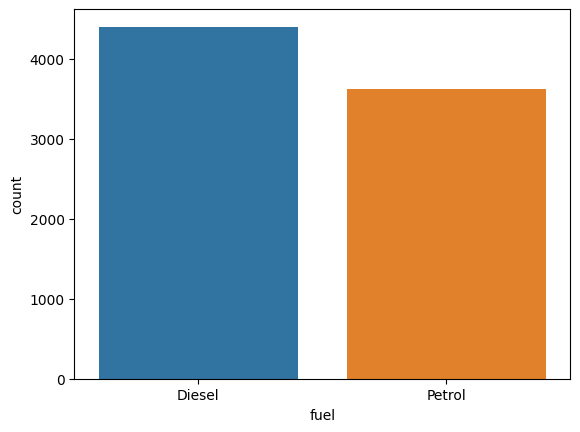

In [388]:
sns.countplot(data = df, x = 'fuel')

#### The dataset contains nearly equal no of cars with fuel type diesel and petrol

<Axes: xlabel='owner', ylabel='count'>

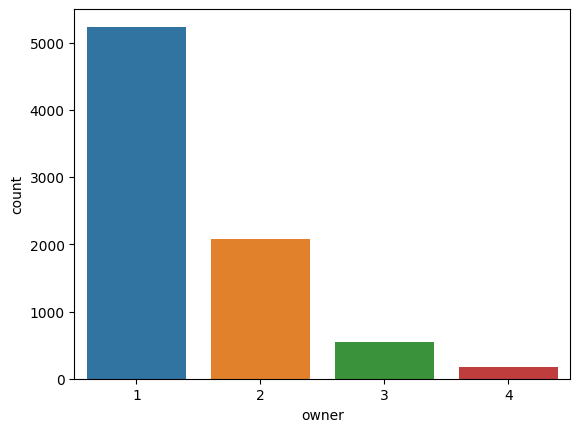

In [389]:
sns.countplot(data = df, x = 'owner')

##### First owners are in majority in the dataset

##### Distplot

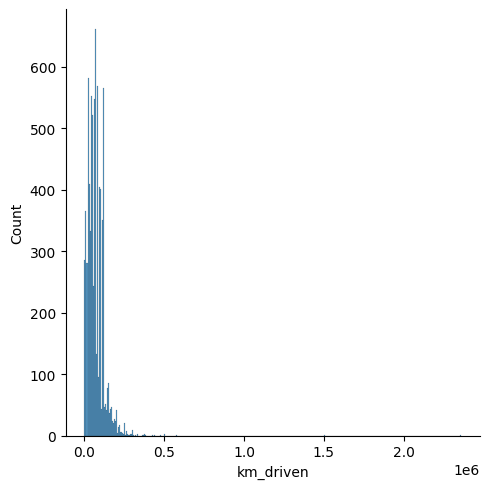

In [390]:
sns.displot(data = df, x = 'km_driven')

The majority distribution fall into the range 0-50000 KM and the distribution is right skewed

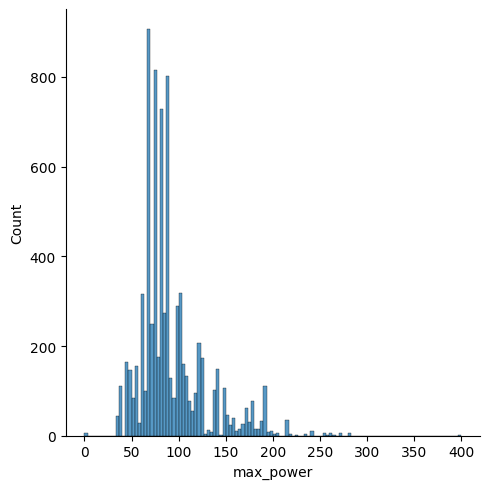

In [391]:
sns.displot(data = df, x = 'max_power')

##### The distribution for max power is also slightly right skewed

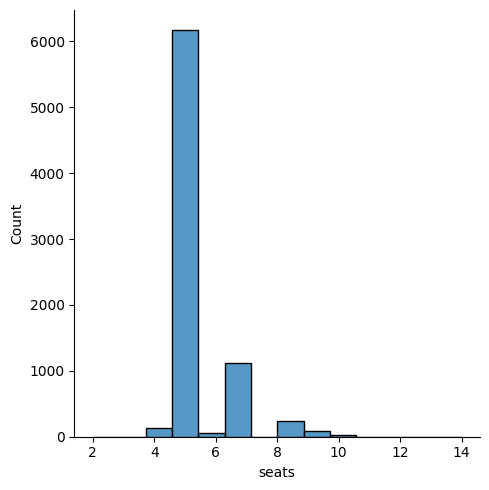

In [392]:
sns.displot(data = df, x = 'seats')

##### The dataset contains majority of 5 seater cars

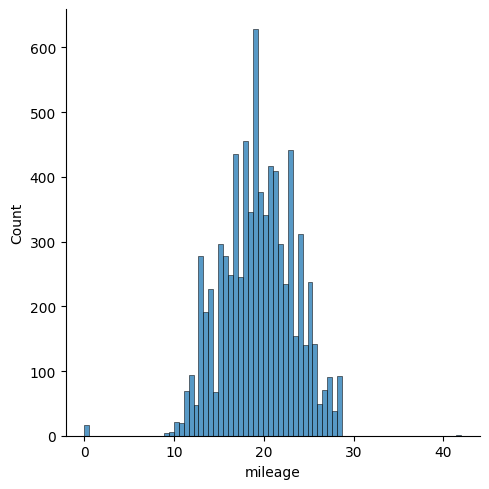

In [393]:
sns.displot(data = df, x = 'mileage')

##### The mileage is normally distributed

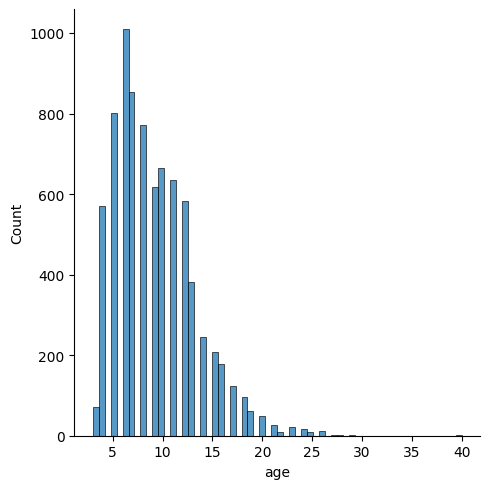

In [394]:
sns.displot(data = df, x = 'age')

### Multivariate analysis

##### Boxplot

Text(0.5, 0, 'Fuel')

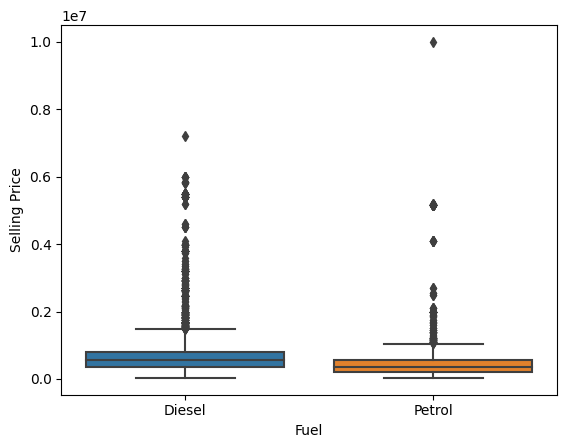

In [395]:
# Box plot on "Fuel"
sns.boxplot(x = df["fuel"], y = df["selling_price"]);
plt.ylabel("Selling Price")
plt.xlabel("Fuel")

Text(0.5, 0, 'Transmission')

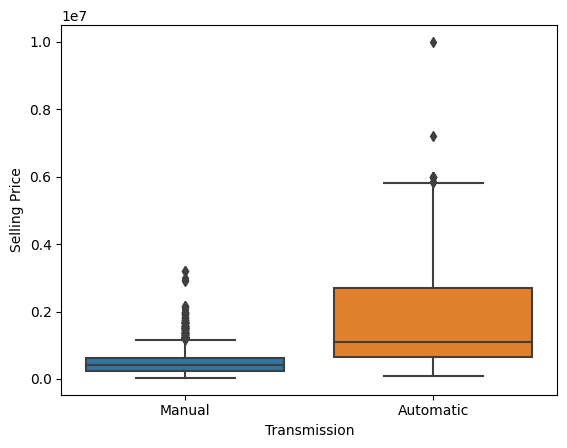

In [396]:
# Box plot on "Transmission"
sns.boxplot(x = df["transmission"], y = df["selling_price"]);
plt.ylabel("Selling Price")
plt.xlabel("Transmission")

Text(0.5, 0, 'Seller Ty')

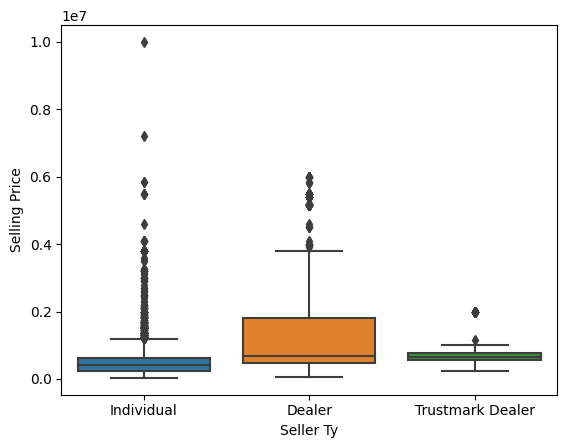

In [397]:
# Box plot on "seller_type"
sns.boxplot(x = df["seller_type"], y = df["selling_price"]);
plt.ylabel("Selling Price")
plt.xlabel("Seller Ty")

Text(0.5, 0, 'Owner')

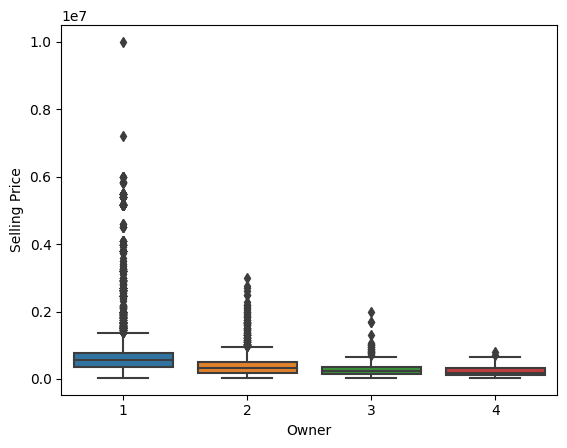

In [398]:
# Box plot on "owner"
sns.boxplot(x = df["owner"], y = df["selling_price"]);
plt.ylabel("Selling Price")
plt.xlabel("Owner")

### Scatter Plot

<Axes: xlabel='max_power', ylabel='selling_price'>

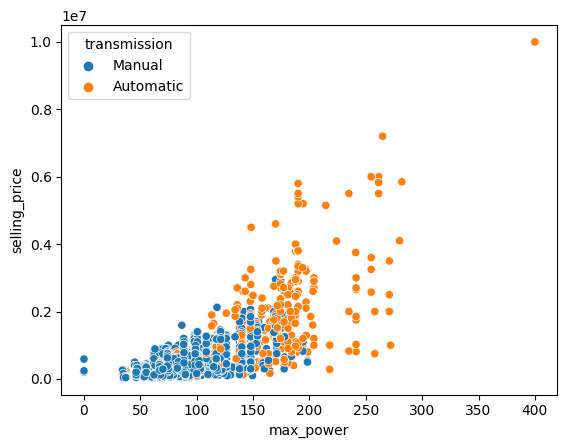

In [399]:
sns.scatterplot(x = df['max_power'], y = df['selling_price'], hue=df['transmission'])

##### The plot shows positive correlation as the max_power increases the selling price also increase



<Axes: xlabel='age', ylabel='selling_price'>

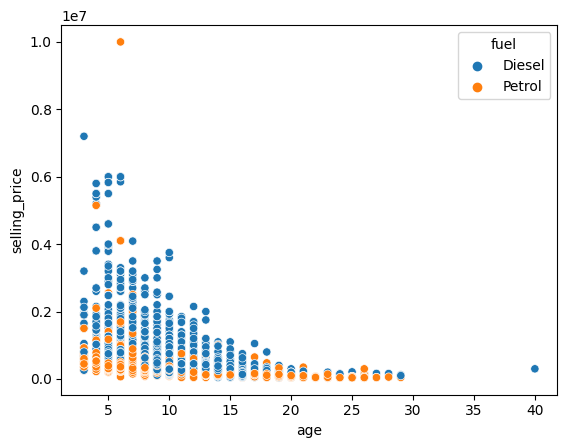

In [400]:
sns.scatterplot(x = df['age'], y = df['selling_price'], hue=df['fuel'])

##### The plot shows negative correlation as the age increases the selling price decrease

<Axes: xlabel='km_driven', ylabel='age'>

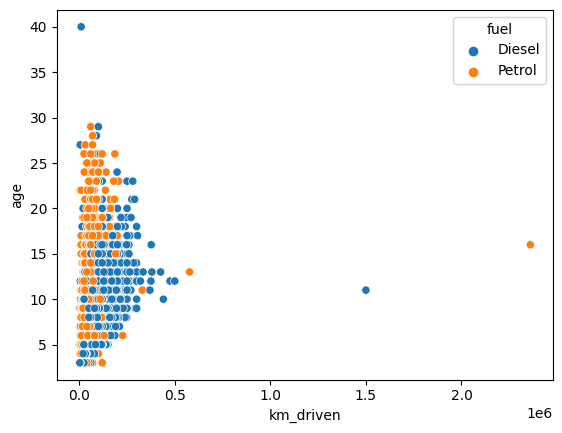

In [401]:
sns.scatterplot(x = df['km_driven'], y = df['age'], hue=df['fuel'])

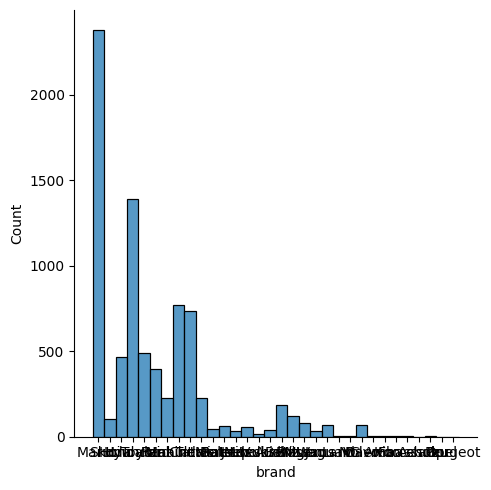

In [402]:
sns.displot(data = df, x = 'brand')

In [403]:
#Since there large variation in brand let's drop this
df = df.drop('brand', axis=1)

<ipython-input-404-fc847b63d2a3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap = 'magma')


<Axes: >

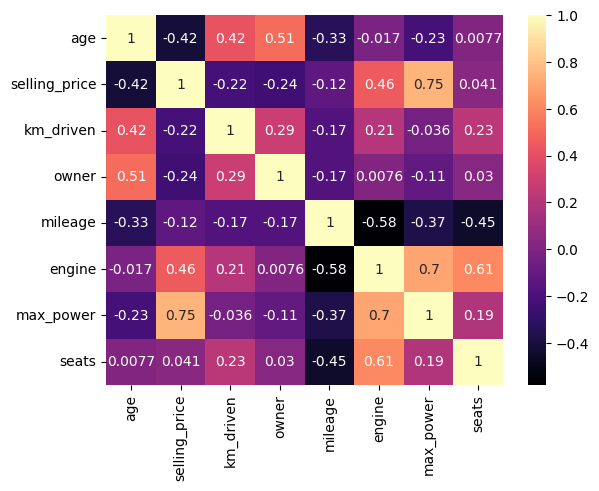

In [404]:
sns.heatmap(df.corr(), annot=True, cmap = 'magma')

### Lable Encoding Categorical Features

In [405]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["fuel"] = le.fit_transform(df["fuel"])
df["seller_type"] = le.fit_transform(df["seller_type"])
df["transmission"] = le.fit_transform(df["transmission"])
df["owner"] = le.fit_transform(df["owner"])

In [406]:
df.head()

,age,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,9,450000,145500,0,1,1,0,23.40,1248.0,74.00,5.0
1,9,370000,120000,0,1,1,1,21.14,1498.0,103.52,5.0
2,17,158000,140000,1,1,1,2,17.70,1497.0,78.00,5.0
3,13,225000,127000,0,1,1,0,23.00,1396.0,90.00,5.0
4,16,130000,120000,1,1,1,0,16.10,1298.0,88.20,5.0


### Feature selection

In [440]:
#With the help of above analysis the below most relevant features were identified

X = df[['age', 'mileage', 'engine', 'max_power']]
y = df['selling_price']

### Train test split

In [408]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [409]:
X_train

,age,mileage,engine,max_power
6853,8,13.58,2499.0,72.40
1495,10,15.96,2523.0,62.10
7904,10,20.77,1248.0,88.76
1281,13,18.80,1248.0,90.00
1421,13,23.00,1396.0,90.00
...,...,...,...,...
5293,10,20.36,1197.0,78.90
5461,7,20.51,998.0,67.04
865,8,20.77,1248.0,88.76
7701,4,22.37,2487.0,214.56


In [410]:
print(X_train['mileage'].median())
print(X_train['engine'].median())
print(X_train['max_power'].median())

19.33
1248.0
82.4


### Preprocessing

###### Null Values

In [411]:
#check for null values in training features
X_train.isna().sum()

age            0
mileage      154
engine       154
max_power    149
dtype: int64

In [412]:
#Handle missing values in training features by replacing it with the medium values
X_train.fillna(X_train.median(), inplace = True)

In [413]:

#confirming the missing value is handled
X_train.isna().sum()

age          0
mileage      0
engine       0
max_power    0
dtype: int64

In [414]:
#Doing the same with test data
X_test.fillna(X_test.median(), inplace = True)
X_test.isna().sum()

age          0
mileage      0
engine       0
max_power    0
dtype: int64

In [415]:
#check for missiing values in label
print(y_train.isna().sum())
print(y_test.isna().sum())

0
0


##### Borrowed the code from Regression Analysis
https://github.com/chaklam-silpasuwanchai/Machine-Learning/blob/main/00%20-%20Case%20Study/01%20-%20Case%20Study%20-%20Regression.ipynb]

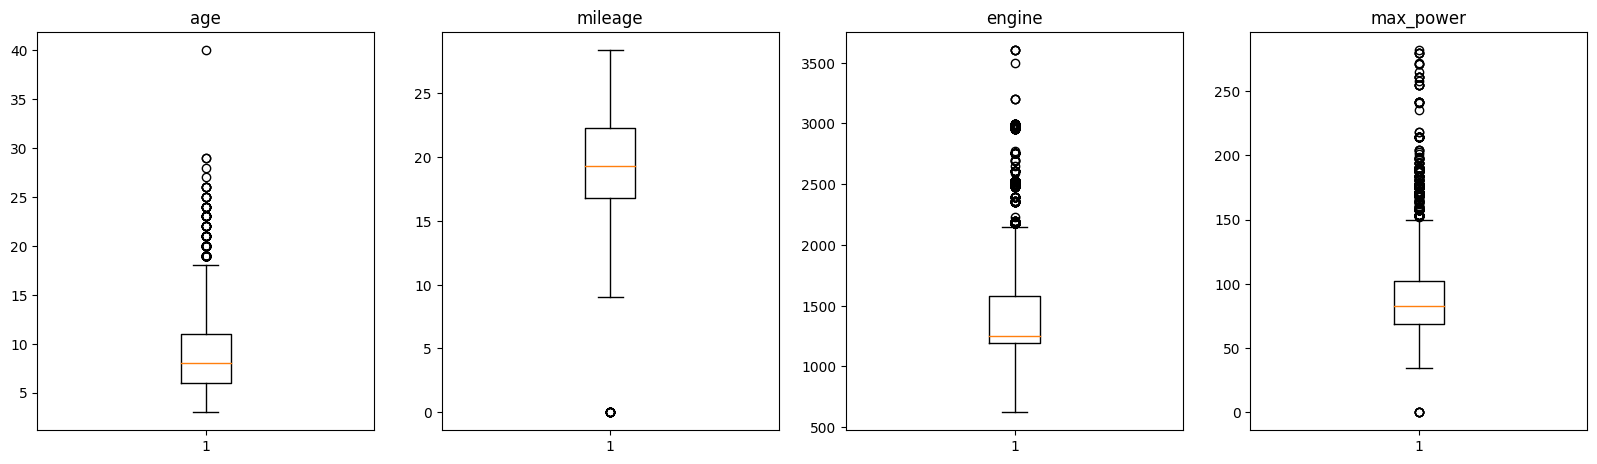

In [416]:
# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for i,col in enumerate(list(X_train.columns)):
  plt.subplot(5,4,i+1)
  plt.boxplot(X_train[col])
  plt.title(col)



# for variable,i in col_dict.items():
#                      plt.subplot(5,4,i)
#                      plt.boxplot(X_train[variable])
#                      plt.title(variable)

plt.show()

In [417]:
def outlier_count(col, data =X_train):
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    # calculate your inter quatile
    iqr = q75 - q25
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [418]:
for col in X_train.columns:
    outlier_count(col)


---------------age---------------

Number of outliers: 145
Percent of data that is outlier: 2.58%

---------------mileage---------------

Number of outliers: 14
Percent of data that is outlier: 0.25%

---------------engine---------------

Number of outliers: 836
Percent of data that is outlier: 14.88%

---------------max_power---------------

Number of outliers: 409
Percent of data that is outlier: 7.28%


##### We can see from the above results that "seller_type", "transmission", "engine" and "seats" have very high outlier percentage

In [419]:
#Feature Scaling is performed to get the uniform feature value range across all the features

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)



In [420]:
X_train[33]

array([ 2.46623062, -1.51773742,  0.67281715,  0.93753587])

In [421]:
y_train[33]

730000

In [422]:
#Shape of all the features and label of training and test data
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (5619, 4)
Shape of X_test:  (2409, 4)
Shape of y_train:  (5619,)
Shape of y_test:  (2409,)


In [423]:
#Test Using Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)

print("MSE: ", mean_squared_error(y_test, yhat))
print("r2: ", r2_score(y_test, yhat))

MSE:  245542437477.8089
r2:  0.6325711089406074


In [424]:
#Test Using Ramdom Forest Regression Model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=12, bootstrap=True)
rf.fit(X_train, y_train)
yhat = rf.predict(X_test)

print("MSE: ", mean_squared_error(y_test, yhat))
print("r2: ", r2_score(y_test, yhat))

MSE:  31074715300.028164
r2:  0.9534998988363974


### Fitting the training data with various regression algorithms with cross validation to find out the best model.

In [425]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Libraries for model evaluation

# Various Regression algorithms
algorithms = [LinearRegression(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(random_state = 0),
              RandomForestRegressor(n_estimators = 100, random_state = 0)]

# Corresponding algorithms name
algo_names = ["Linear Regression", "SVR", "KNeighbors Regressor", "Decision-Tree Regressor", "Random-Forest Regressor"]

In [426]:
from sklearn.model_selection import KFold, cross_val_score

#defining splits
kfold = KFold(n_splits=5, shuffle=True)

for i, model in enumerate(algorithms):
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print(f"{algo_names[i]} - Score: {scores}; Mean: {scores.mean()}")

Linear Regression - Score: [-2.52592234e+11 -2.28988996e+11 -2.40299236e+11 -2.27578959e+11
 -2.36375153e+11]; Mean: -237166915671.71075
SVR - Score: [-6.02543872e+11 -7.12456773e+11 -6.24016349e+11 -5.82229003e+11
 -8.30469875e+11]; Mean: -670343174529.8865
KNeighbors Regressor - Score: [-4.22391615e+10 -2.10340069e+10 -4.42807303e+10 -2.06508501e+10
 -3.69321983e+10]; Mean: -33027389396.7843
Decision-Tree Regressor - Score: [-2.66711525e+10 -3.08820409e+10 -3.39672764e+10 -2.61271469e+10
 -2.30478926e+10]; Mean: -28139101859.45226
Random-Forest Regressor - Score: [-2.18986599e+10 -1.49326373e+10 -2.60149416e+10 -2.34747450e+10
 -2.32041790e+10]; Mean: -21905032557.512527


##### Since the random forest regressor has lowest mean of negetive mean square error we will perform the cross validation and gridsearch with various parameters in RandomForestRegressor

In [427]:
from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap': [True], 'max_depth': [5, 10, None],
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 20, 50, 100, 200]}

rf = RandomForestRegressor(random_state = 1)

grid = GridSearchCV(estimator = rf,
                    param_grid = param_grid,
                    cv = kfold,
                    n_jobs = -1,
                    return_train_score=True,
                    refit=True,)

# Fit your grid_search
grid.fit(X_train, y_train);  #fit means start looping all the possible parameters

In [428]:
grid.best_params_

{'bootstrap': True, 'max_depth': None, 'n_estimators': 50}

In [429]:
best_mse = grid.best_score_

In [430]:
best_mse

0.9652992935120899

In [431]:
#### Now we train the RandomForest Model with best parameters
best_rf = RandomForestRegressor(n_estimators=50, bootstrap=True)
best_rf.fit(X_train, y_train)
ypred = best_rf.predict(X_test)

print("r2: ", r2_score(y_test, ypred))

r2:  0.9554723372271072


##### This is the final R2 score for the best model

### Testing

In [432]:
#Calculate the R2 score on the test dataset
from sklearn.metrics import mean_squared_error, r2_score
ypred = grid.predict(X_test)
r2_score(y_test, yhat)

0.9534998988363974

#####  Feature Importance

##### Know how much the model has given importance for each selected feature

In [433]:
#stored in this variable
#note that grid here is random forest
best_rf = grid.best_estimator_
best_rf.feature_importances_

array([0.21139558, 0.02319979, 0.03613639, 0.72926824])

Text(0.5, 0, 'Random Forest Feature Importance')

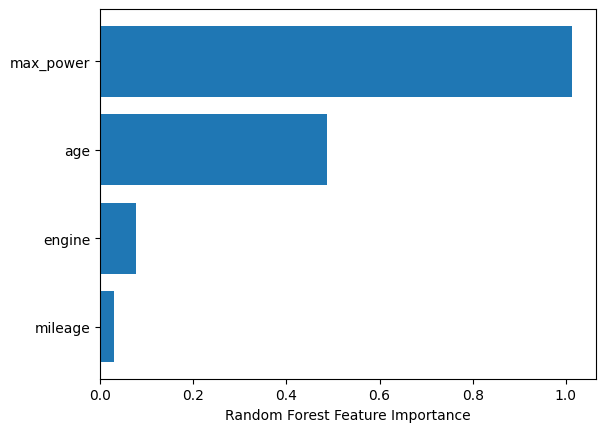

In [434]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(best_rf, X_test, y_test)

#let's plot
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

### Save the best model in the into model file

In [436]:
import pickle
filename = 'app/model/car-price.model'
pickle.dump(best_rf, open(filename, 'wb'))

## Summary

## Data Preparation:

##### Data Processing was done according to the requirement provided in the assignment. The unnecessary columns were pruned. Various tranformation on various columns to get the final dataframe.

## EDA:
##### EDA was performed on the processed dataset. With the help of various analysis such as distribution plot, box plot, scatter plot, the attibutes of the various features were analysed.

## Feature Selection:
##### With the help of EDA performed on the data, most relevent features were selected. The selected features were:
- Age
* Mileage
+ Engine
- Max Power
##### With label Selling Price

## Preprocessing:

##### The categorical features were converted into numerical features with label encoder

##### After selecting the relevant features the data was seperated as training and testing. 70% was used for training and remaining 30% was used for testig purpose.

##### The training and testing  set of features and label was checked if those contained null value. The features that contained the null value were filled with the midean of their distribution.

#### Finally to make the training dataset uniform the training features were normalized using StandartScalar.

## The data was finally ready for training with various Regressing algorithms.

#### Training Data(features and label) was finally fitted with various Regression Algorithms. The algorithms used were:
- Linear Regression
- SVR
- KNeighbors Regressor
- Decision-Tree Regressor
- Random-Forest Regressor

Out of all, Random-Forest Regressor performed the best on the training data. So the Random forest regression with cross-validation on various parameters was trained using GridSearch.

### Finally the model was tested on test data and the model was saved to the file using pickle.




## Final Comments

### The model still has very high Mean Square Error, so it can be further improved using various upcoming techniques like, Regularization etc.

